In [42]:
#import package
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

In [43]:
#import data
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Data Analysis

In [44]:
#checking the null value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
#handling the missing value
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
#eliminate the customerID column(as there is no use of it)
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

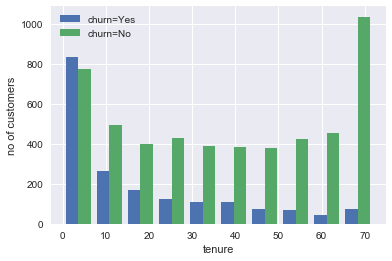

In [48]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('no of customers')
plt.hist([tenure_churn_yes,tenure_churn_no], label=['churn=Yes','churn=No'])
plt.legend()

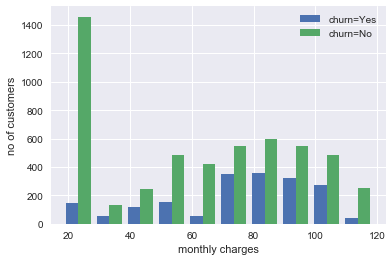

In [49]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel('monthly charges')
plt.ylabel('no of customers')
plt.hist([mc_churn_yes,mc_churn_no], label=['churn=Yes','churn=No'])
plt.legend()

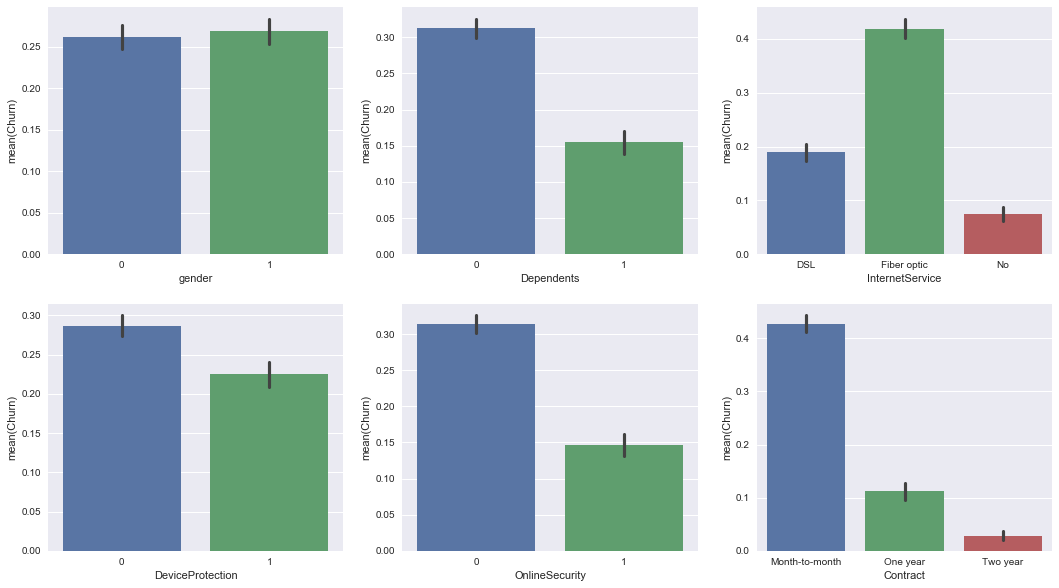

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
sns.barplot(df['gender'], df['Churn'],  ax=ax[0][0])
sns.barplot(df['Dependents'], df['Churn'], ax=ax[0][1])
sns.barplot(df['InternetService'], df['Churn'], ax=ax[0][2])
sns.barplot(df['DeviceProtection'], df['Churn'], ax=ax[1][0])
sns.barplot(df['OnlineSecurity'], df['Churn'], ax=ax[1][1])
sns.barplot(df['Contract'], df['Churn'],  ax=ax[1][2])

# Data Preparation

In [51]:
# unique values for each column containing a categorical feature
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [52]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [53]:
# switch 'No inernet service to 'No' and ''No phone service' to 'No'
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [54]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [55]:
# replace Yes with 1 and No with 0 as ml is good in handling numerical data

In [56]:
yes_no_columns={'Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup'
               ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'}
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [57]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 55
 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[ 29.85  56.95  53.85 ...,  63.1   44.2   78.7 ]
TotalCharges:[   29.85  1889.5    108.15 ...,   346.45   306.6   6844.5 ]
Churn:[0 1]


In [58]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [59]:
#get dummies variable for columns 'InternetService','Contract','PaymentMethod'
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [60]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [61]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Machine learning model

In [62]:
#scale these variable between o to 1
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df['TotalCharges'].dtype

dtype('float64')

In [63]:
#feature variable
x=df1.drop('Churn',axis='columns')
# target variable
y=df1['Churn']

In [64]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [65]:
x_train.shape

(4930, 26)

In [66]:
x_test.shape

(2113, 26)

In [67]:
#balanced the data
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_sample(x_train, y_train)

In [68]:
#Support Vector Classifier
from sklearn.svm import SVC
model=SVC()

In [69]:
model.fit(x_train_rus,y_train_rus)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
model.score(x_test,y_test)

0.77520113582584005

In [71]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [72]:
model2=LogisticRegression()
model2.fit(x_train_rus,y_train_rus)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
model2.score(x_test,y_test)

0.79223852342640799

In [74]:
#Decision Tree Classifier
from sklearn import tree

In [75]:
model3=tree.DecisionTreeClassifier()
model3.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
model3.score(x_test,y_test)

0.58684335068622806

In [77]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train_rus,y_train_rus)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
model4.score(x_test,y_test)

0.7155702792238523

In [79]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()

In [80]:
model5.fit(x_train_rus,y_train_rus)

GaussianNB(priors=None)

In [81]:
model5.score(x_test,y_test)

0.68717463322290584

In [82]:
# Hyper parameter tuning 

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
#svc
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(model, param_grid,scoring='recall')
grid_result = grid_search.fit(x_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.9738461538461538 for {'C': 0.0001, 'kernel': 'poly'}


In [85]:
#logistic regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(model2, param_grid, scoring='recall')
grid_result = grid_search.fit(x_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8715384615384615 for {'C': 0.0001, 'solver': 'liblinear'}


             precision    recall  f1-score   support

          0       0.86      0.83      0.84      1544
          1       0.58      0.62      0.60       569

avg / total       0.78      0.78      0.78      2113



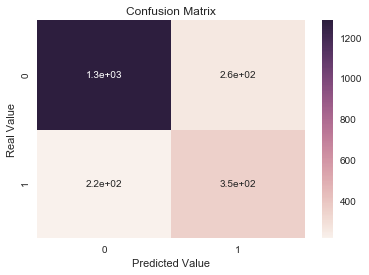

In [86]:
#svc 
# prediction
y_pred_svc = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred_svc))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1544
          1       0.69      0.42      0.52       569

avg / total       0.78      0.79      0.77      2113



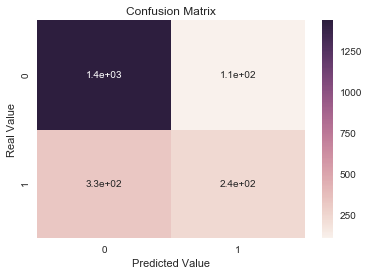

In [87]:
#logistic regression
y_pred_lr = model2.predict(x_test)

# classification report
print(classification_report(y_test, y_pred_lr))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

# conclusion